# Stereoisomer testing on ptree - enantiomers

## Importing section

In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import sys

sys.path.append("../../../../")

from ptgnn.features.chienn.molecule3d import smiles_to_3d_mol
from ptgnn.features.chienn.mol_to_data import mol_to_data
from ptgnn.transform import edge_graph_transform, vertex_graph_transform
from ptgnn.model.modules.ptree.complex_ptree_layer import ComplexPtreeLayer

## Define SMILES strings

In [2]:
smiles_list = [
    "C(Br)(Cl)F",
    "[C@H](Br)(Cl)F",
    "[C@H](Br)(Cl)F",
    "[C@@H](Br)(Cl)F",
]

## Visualize and confirm stereomer classification (E/Z)

In [3]:
def showAndChiral(smiles):
    mol = Chem.MolFromSmiles(smiles)
    display(mol)
    print(AllChem.FindMolChiralCenters(mol, includeUnassigned=True))
    for bond in mol.GetBonds():
        if bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            print("Bond", bond.GetIdx(), "stereo:", bond.GetStereo())

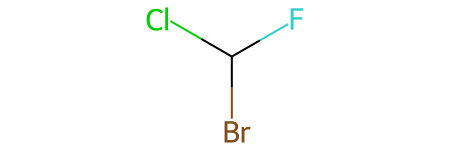

[(0, '?')]


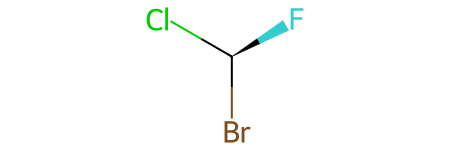

[(0, 'R')]


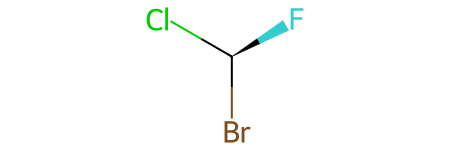

[(0, 'R')]


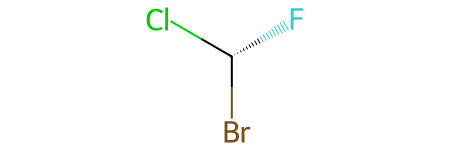

[(0, 'S')]


In [4]:
for smile in smiles_list:
    showAndChiral(smile)

##  Convert to (edge) graph with ptree

In [5]:
# get molecules
mol_list = [
    smiles_to_3d_mol(
        smiles,
        max_number_of_attempts=100,
        max_number_of_atoms=100
    )
    for smiles in smiles_list
]

In [6]:
data_list = [
    mol_to_data(mol)
    for mol in mol_list
]

In [7]:
data_list = [
    edge_graph_transform(
        data,
        transformation_mode="permutation_tree",
        mol=mol,
        transformation_parameters={
            'k':  3,
            'tetrahedral_chiral': True
        }
    )
    for data, mol in zip(data_list, mol_list)
]

In [8]:
d = data_list[0]
display(d.ptree, d.initial_map)
for i in range(d.num_layer):
    display(f"layer: {i}")
    display(d[f"layer{i}_order_matrix"], d[f"layer{i}_type_mask"], d[f"layer{i}_pooling"])

['{"S": [0, 1]}',
 '{"S": [1, 0, {"Z": [3, 7, 5]}]}',
 '{"S": [2, 3, {"Z": [0, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"Z": [0, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"Z": [0, 3, 5]}]}',
 '{"S": [7, 6]}']

tensor([0, 1, 1, 0, 3, 7, 5, 2, 3, 0, 5, 7, 3, 2, 4, 5, 0, 7, 3, 5, 4, 6, 7, 0,
        3, 5, 7, 6])

'layer: 0'

[[tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
           18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
          [-1, -1, -1, -1,  5,  6,  4, -1, -1, 10, 11,  9, -1, -1, -1, -1, 17, 18,
           16, -1, -1, -1, -1, 24, 25, 23, -1, -1],
          [-1, -1, -1, -1,  6,  4,  5, -1, -1, 11,  9, 10, -1, -1, -1, -1, 18, 16,
           17, -1, -1, -1, -1, 25, 23, 24, -1, -1]], dtype=torch.int32)]]

[[tensor([0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2,
          2, 2, 0, 0])]]

[[tensor([ 0,  1,  2,  3,  4,  4,  4,  5,  6,  7,  7,  7,  8,  9, 10, 11, 12, 12,
          12, 13, 14, 15, 16, 17, 17, 17, 18, 19])]]

'layer: 1'

[[tensor([[ 0, -1,  2, -1, -1,  5, -1, -1,  8, -1, 10, -1, -1, 13, -1, 15, -1, -1,
           18, -1],
          [ 1, -1,  3, -1, -1,  6, -1, -1,  9, -1, 11, -1, -1, 14, -1, 16, -1, -1,
           19, -1],
          [-1, -1,  4, -1, -1,  7, -1, -1, -1, -1, 12, -1, -1, -1, -1, 17, -1, -1,
           -1, -1]], dtype=torch.int32)]]

[[tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])]]

[[tensor([0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7])]]

In [9]:
for data in data_list:
    print(data)
    print(data.ptree)

Data(x=[8, 93], edge_index=[2, 20], edge_attr=[20, 57], pos=[8, 6], parallel_node_index=[8], circle_index=[8], ptree=[8], initial_map=[28], layer0_order_matrix=[1], layer0_type_mask=[1], layer0_pooling=[1], num_layer=2, layer1_order_matrix=[1], layer1_type_mask=[1], layer1_pooling=[1])
['{"S": [0, 1]}', '{"S": [1, 0, {"Z": [3, 7, 5]}]}', '{"S": [2, 3, {"Z": [0, 5, 7]}]}', '{"S": [3, 2]}', '{"S": [4, 5, {"Z": [0, 7, 3]}]}', '{"S": [5, 4]}', '{"S": [6, 7, {"Z": [0, 3, 5]}]}', '{"S": [7, 6]}']
Data(x=[8, 93], edge_index=[2, 20], edge_attr=[20, 57], pos=[8, 6], parallel_node_index=[8], circle_index=[8], ptree=[8], initial_map=[28], layer0_order_matrix=[1], layer0_type_mask=[1], layer0_pooling=[1], num_layer=2, layer1_order_matrix=[1], layer1_type_mask=[1], layer1_pooling=[1])
['{"S": [0, 1]}', '{"S": [1, 0, {"Z": [3, 7, 5]}]}', '{"S": [2, 3, {"Z": [0, 5, 7]}]}', '{"S": [3, 2]}', '{"S": [4, 5, {"Z": [0, 7, 3]}]}', '{"S": [5, 4]}', '{"S": [6, 7, {"Z": [0, 3, 5]}]}', '{"S": [7, 6]}']
Data(x=[

## Create Model

In [10]:
from ptgnn.model.modules.ptree.advanced_tree_layer import AdvancedPermutationTreeLayer

k = 3

model = AdvancedPermutationTreeLayer(
    hidden_dim=93,
    k=k
)

## Create batches

In [12]:
from ptgnn.loading.collate import permutation_tree_collation

batch_list = [
    permutation_tree_collation([data])
    for data in data_list
]

In [13]:
for idx, batch in enumerate(batch_list):
    display(f"Batch: {idx}")
    display(batch.ptree)
    display(batch.initial_map)
    for layer_idx in range(batch.num_layer):
        display(f"Layer: {layer_idx}")
        display(
            batch[f"layer{layer_idx}_order_matrix"],
            batch[f"layer{layer_idx}_type_mask"],
            batch[f"layer{layer_idx}_pooling"]
        )

'Batch: 0'

['{"S": [0, 1]}',
 '{"S": [1, 0, {"Z": [3, 7, 5]}]}',
 '{"S": [2, 3, {"Z": [0, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"Z": [0, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"Z": [0, 3, 5]}]}',
 '{"S": [7, 6]}']

tensor([0, 1, 1, 0, 3, 7, 5, 2, 3, 0, 5, 7, 3, 2, 4, 5, 0, 7, 3, 5, 4, 6, 7, 0,
        3, 5, 7, 6])

'Layer: 0'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
        [-1, -1, -1, -1,  5,  6,  4, -1, -1, 10, 11,  9, -1, -1, -1, -1, 17, 18,
         16, -1, -1, -1, -1, 24, 25, 23, -1, -1],
        [-1, -1, -1, -1,  6,  4,  5, -1, -1, 11,  9, 10, -1, -1, -1, -1, 18, 16,
         17, -1, -1, -1, -1, 25, 23, 24, -1, -1]], dtype=torch.int32)

tensor([0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2,
        2, 2, 0, 0])

tensor([ 0,  1,  2,  3,  4,  4,  4,  5,  6,  7,  7,  7,  8,  9, 10, 11, 12, 12,
        12, 13, 14, 15, 16, 17, 17, 17, 18, 19])

'Layer: 1'

tensor([[ 0, -1,  2, -1, -1,  5, -1, -1,  8, -1, 10, -1, -1, 13, -1, 15, -1, -1,
         18, -1],
        [ 1, -1,  3, -1, -1,  6, -1, -1,  9, -1, 11, -1, -1, 14, -1, 16, -1, -1,
         19, -1],
        [-1, -1,  4, -1, -1,  7, -1, -1, -1, -1, 12, -1, -1, -1, -1, 17, -1, -1,
         -1, -1]], dtype=torch.int32)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

tensor([0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7])

'Batch: 1'

['{"S": [0, 1]}',
 '{"S": [1, 0, {"Z": [3, 7, 5]}]}',
 '{"S": [2, 3, {"Z": [0, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"Z": [0, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"Z": [0, 3, 5]}]}',
 '{"S": [7, 6]}']

tensor([0, 1, 1, 0, 3, 7, 5, 2, 3, 0, 5, 7, 3, 2, 4, 5, 0, 7, 3, 5, 4, 6, 7, 0,
        3, 5, 7, 6])

'Layer: 0'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
        [-1, -1, -1, -1,  5,  6,  4, -1, -1, 10, 11,  9, -1, -1, -1, -1, 17, 18,
         16, -1, -1, -1, -1, 24, 25, 23, -1, -1],
        [-1, -1, -1, -1,  6,  4,  5, -1, -1, 11,  9, 10, -1, -1, -1, -1, 18, 16,
         17, -1, -1, -1, -1, 25, 23, 24, -1, -1]], dtype=torch.int32)

tensor([0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2,
        2, 2, 0, 0])

tensor([ 0,  1,  2,  3,  4,  4,  4,  5,  6,  7,  7,  7,  8,  9, 10, 11, 12, 12,
        12, 13, 14, 15, 16, 17, 17, 17, 18, 19])

'Layer: 1'

tensor([[ 0, -1,  2, -1, -1,  5, -1, -1,  8, -1, 10, -1, -1, 13, -1, 15, -1, -1,
         18, -1],
        [ 1, -1,  3, -1, -1,  6, -1, -1,  9, -1, 11, -1, -1, 14, -1, 16, -1, -1,
         19, -1],
        [-1, -1,  4, -1, -1,  7, -1, -1, -1, -1, 12, -1, -1, -1, -1, 17, -1, -1,
         -1, -1]], dtype=torch.int32)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

tensor([0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7])

'Batch: 2'

['{"S": [0, 1]}',
 '{"S": [1, 0, {"Z": [3, 7, 5]}]}',
 '{"S": [2, 3, {"Z": [0, 5, 7]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"Z": [0, 7, 3]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"Z": [0, 3, 5]}]}',
 '{"S": [7, 6]}']

tensor([0, 1, 1, 0, 3, 7, 5, 2, 3, 0, 5, 7, 3, 2, 4, 5, 0, 7, 3, 5, 4, 6, 7, 0,
        3, 5, 7, 6])

'Layer: 0'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
        [-1, -1, -1, -1,  5,  6,  4, -1, -1, 10, 11,  9, -1, -1, -1, -1, 17, 18,
         16, -1, -1, -1, -1, 24, 25, 23, -1, -1],
        [-1, -1, -1, -1,  6,  4,  5, -1, -1, 11,  9, 10, -1, -1, -1, -1, 18, 16,
         17, -1, -1, -1, -1, 25, 23, 24, -1, -1]], dtype=torch.int32)

tensor([0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2,
        2, 2, 0, 0])

tensor([ 0,  1,  2,  3,  4,  4,  4,  5,  6,  7,  7,  7,  8,  9, 10, 11, 12, 12,
        12, 13, 14, 15, 16, 17, 17, 17, 18, 19])

'Layer: 1'

tensor([[ 0, -1,  2, -1, -1,  5, -1, -1,  8, -1, 10, -1, -1, 13, -1, 15, -1, -1,
         18, -1],
        [ 1, -1,  3, -1, -1,  6, -1, -1,  9, -1, 11, -1, -1, 14, -1, 16, -1, -1,
         19, -1],
        [-1, -1,  4, -1, -1,  7, -1, -1, -1, -1, 12, -1, -1, -1, -1, 17, -1, -1,
         -1, -1]], dtype=torch.int32)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

tensor([0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7])

'Batch: 3'

['{"S": [0, 1]}',
 '{"S": [1, 0, {"Z": [3, 5, 7]}]}',
 '{"S": [2, 3, {"Z": [0, 7, 5]}]}',
 '{"S": [3, 2]}',
 '{"S": [4, 5, {"Z": [0, 3, 7]}]}',
 '{"S": [5, 4]}',
 '{"S": [6, 7, {"Z": [0, 5, 3]}]}',
 '{"S": [7, 6]}']

tensor([0, 1, 1, 0, 3, 5, 7, 2, 3, 0, 7, 5, 3, 2, 4, 5, 0, 3, 7, 5, 4, 6, 7, 0,
        5, 3, 7, 6])

'Layer: 0'

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
        [-1, -1, -1, -1,  5,  6,  4, -1, -1, 10, 11,  9, -1, -1, -1, -1, 17, 18,
         16, -1, -1, -1, -1, 24, 25, 23, -1, -1],
        [-1, -1, -1, -1,  6,  4,  5, -1, -1, 11,  9, 10, -1, -1, -1, -1, 18, 16,
         17, -1, -1, -1, -1, 25, 23, 24, -1, -1]], dtype=torch.int32)

tensor([0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2,
        2, 2, 0, 0])

tensor([ 0,  1,  2,  3,  4,  4,  4,  5,  6,  7,  7,  7,  8,  9, 10, 11, 12, 12,
        12, 13, 14, 15, 16, 17, 17, 17, 18, 19])

'Layer: 1'

tensor([[ 0, -1,  2, -1, -1,  5, -1, -1,  8, -1, 10, -1, -1, 13, -1, 15, -1, -1,
         18, -1],
        [ 1, -1,  3, -1, -1,  6, -1, -1,  9, -1, 11, -1, -1, 14, -1, 16, -1, -1,
         19, -1],
        [-1, -1,  4, -1, -1,  7, -1, -1, -1, -1, 12, -1, -1, -1, -1, 17, -1, -1,
         -1, -1]], dtype=torch.int32)

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

tensor([0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7])

In [14]:
# compare output
display(np.array(
    [
        [
            (batch_list[i].x == batch_list[j].x).all()
            for j in range(len(batch_list))
        ]
        for i in range(len(batch_list))
    ]
))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## Put batches through model

In [15]:
out_list = [
    model(batch)
    for batch in batch_list
]

In [16]:
out_list

[tensor([[-2.0188e-01, -1.8541e-01, -6.8832e-02, -8.5293e-02, -1.0203e-01,
           2.6727e-01, -2.6114e-01,  1.7088e-01, -1.1827e-01,  2.7355e-02,
          -2.1236e-01,  1.1431e-01,  2.9615e-01,  1.0904e-01,  5.2518e-02,
           3.5079e-03,  1.3786e-02, -3.6141e-02, -7.6425e-02, -1.4975e-01,
           3.9476e-02,  1.1799e-01, -1.4267e-01, -4.3577e-02,  2.4822e-02,
           5.1190e-05,  2.0979e-01,  3.8638e-02,  1.2955e-01,  3.3094e-01,
           9.1369e-02,  1.7914e-01, -2.9443e-02, -2.4777e-01,  2.0739e-01,
          -8.9972e-02, -4.2540e-02,  5.6063e-02, -4.6134e-02, -1.9425e-01,
          -8.9796e-02, -1.3797e-01, -5.9405e-02,  4.6593e-01, -2.6565e-01,
           1.6601e-01, -2.6030e-01, -2.2472e-01,  1.5248e-01, -1.2581e-01,
          -1.6206e-01,  2.7150e-01,  3.9490e-03,  8.2810e-02,  8.0382e-02,
          -3.0168e-02,  1.5749e-02,  1.7271e-01, -4.2086e-02, -4.0406e-02,
           2.4766e-01,  1.5169e-01, -2.6738e-01,  2.1730e-01,  1.9236e-01,
          -2.4536e-01, -1

## Compare batches

In [17]:
# compare output
display(np.array(
    [
        [
            (out_list[i] == out_list[j]).all()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[ True,  True,  True, False],
       [ True,  True,  True, False],
       [ True,  True,  True, False],
       [False, False, False,  True]])

In [18]:
# compare sum pooled version itself
display(np.array(
    [
        [
            out_list[i].sum().item() - out_list[j].sum().item()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
) == 0)

array([[ True,  True,  True, False],
       [ True,  True,  True, False],
       [ True,  True,  True, False],
       [False, False, False,  True]])

In [19]:
# compare output
display(np.array(
    [
        [
            (out_list[i] - out_list[j]).detach().abs().sum()
            for j in range(len(out_list))
        ]
        for i in range(len(out_list))
    ]
))

array([[0.        , 0.        , 0.        , 0.38195536],
       [0.        , 0.        , 0.        , 0.38195536],
       [0.        , 0.        , 0.        , 0.38195536],
       [0.38195536, 0.38195536, 0.38195536, 0.        ]], dtype=float32)